## Relatório 2 - Investigando Dados Titanic - Udacity
#### Eric Amorim

Relatório do projeto 2 do Nanodegree da Udacity Fundamentos de Data Science I que tem como objetivo de realizar a análise de dados com compartilhamento de informações a partir do conjunto de dados disponível no [Kaggle](https://www.kaggle.com/c/titanic/overview) (_Titanic: Machine Learning from Disaster_). O projeto será composto pelas etapas básicas da análises de dados: questionar, preparar, explorar, concluir e comunicar (sendo o envio para avaliação).

<img alt="RMS_Titanic"  align="center" style="width:500px" src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg"  /><br>

O tema definido tem como histórico um dos maiores acidentes da humanidade, já documento em [filme](http://www.adorocinema.com/filmes/filme-5818/) lançado em 1997 que recentemente completou [21 anos](https://f5.folha.uol.com.br/cinema/2017/12/titanic-comemora-20-anos-saiba-curiosidades.shtml). O navio foi pensado para ser o navio mais luxuoso e mais seguro de sua época, tendo partido de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Indo contra todas as lendas até então (de que o navio era impossível de afundar) ele colidiu com um iceberg na noite do dia 14 de abril e afundou na madrugada do dia seguinte, porém permanecendo na história.

A análise do arquivo nos dará diversas informações; podemos focar em alguns **questionamentos**, tais como:

> Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?<br>
Sobreviveram mais homens ou mulheres?<br>
Qual a classe com maior número de sobreviventes? Pagar passagens de classes mais elevadas da melhor condição para sobrebriver?<br>
Qual o preço médio de uma passagem do Titanic?<br>
Qual a média etária dos sobreviventes e mortos?<br>
Existe correlação entre viajar com a família?<br>

## Etapa 1

O arquivo fornecido tem formato csv com diversas linhas e será importado para avaliação de sua condicão e ajustes para avaliação.

In [1]:
#importação de bibliotecas para ingestão, manipulação e visualização de dados do arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#leitura do arquivo csv cedido para análise
df_titanic = pd.read_csv('titanic-data-6.csv')
display(df_titanic.head())
#imprimir na tela a quantidade de linhas e colunas do arquivo que será utilizado
print('Num. linhas {0} e colunas {1}.'.format(df_titanic.shape[0],df_titanic.shape[1]))

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Num. linhas 891 e colunas 12.


Verificamos uma tabela com 891 linhas e 12 colunas. Já temos presente informações de cabeçalho da para análise. Conforme apresentando no site dos dados, temos a descrição de cada informação das colunas do arquivo conforme abaixo.
Tabela verificamos ainda que dados de PassagerId são semelhantes aos indíces gerados e dessa forma podemos utilizá-lo como índice da tabela.

**Tabela indicativa das variáveis para consulta**

|Variável|Definição|Parâmetro|
|--------|----------|----|
|survival|Sobrevivente|0 = Não, 1 = Sim|
|pclass|Classe da Passagem|1 = 1º, 2 = 2º, 3 = 3º
|sex|Sexo	
|Age|Idade em anos	
|sibsp|Quant. de irmãos / cônjuges a bordo do Titanic
|parch|Quant. dos pais / filhos a bordo do Titanic	
|ticket|Número da Passagem	
|fare|Tarifa de Passageiro	
|cabin|Número da Cabine
|embarked|Porto de Embarque|C = Cherbourg, Q = Queenstown, S = Southampton

>Pclass: um proxy para status socioeconômico (SES) e localização no navio: 1º = Primeira Classe ou superior, 2º = Segunda Classe ou intermediária e 3º = Terceira Classe ou inferior.<br>
>Idade: A idade é fracionária se menor que 1. Se a idade é estimada, é na forma de xx.5<br>
>Sibsp: O conjunto de dados define relações familiares como irmão = irmão, irmã, meio-irmão, irmã adotiva e cônjuge = marido, esposa (amantes e noivas foram ignorados)<br>
>Parch: O conjunto de dados define relações familiares como mãe, pai e criança = filha, filho, enteada, enteado. Casos de crianças viajando com babá foram desconsiderado, portanto parch = 0 para elas.<br>

In [3]:
#PassagerId são semelhantes aos indíces gerados portanto será o índice da tabela
df_titanic = pd.read_csv('titanic-data-6.csv', index_col='PassengerId')
display(df_titanic.head())
print('Num. linhas {0} e colunas {1}.'.format(df_titanic.shape[0],df_titanic.shape[1]))

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

Num. linhas 891 e colunas 11.


Agora com a tabela ajustada no indíce temos ainda a mesma quantidade de linhas, porém uma coluna a menos. Entretanto ainda há opções de dados a serem reduzidos para manter o foco nos questionamentos realizados.

# Etapa 2

Vamos iniciar a etapa de preparo os dados, onde serão avaliandas duplicidade de linhas, se faltam valores, ajustando de variáveis de entrada e eliminação de colunas desnecessárias a análise.

In [4]:
#Identificar as linhas duplicadas se existem e quantas
df_titanic.duplicated().sum()

0

In [5]:
#Identificar os recursos com valores faltantes
df_titanic.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

O arquivo não é dotado de linhas duplicadas, porém temos três parâmetros com valores ausentes. Sendo eles: Age (idade), Cabin (cabine) e Embarked (porto/local de embarque).

In [6]:
# Vamos identificar como os dados estão sendo tratados
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Retomando, temos ausentes valores para "Cabin", "Age" e "Embarked". Sendo que destes Cabin não será útil para a análise, portanto iremos desconsiderar a necessidade de ajuste para essa coluna. Para os casos que faltam informação e alguns casos podemos incluir uma média da amostra no conjunto total, porém aqui temos um caso que considera a cidade de embarque e isso pode gerar um problema na análise.

In [7]:
#Verificando se os valores das variáveis corresponde com a tabela resumo.
df_titanic.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
# descarte colunas irrelevantes
df_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Verificando alteracão na tabela indicando a necessidade de visualização de apenas uma linha
df_titanic.head(1)

Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
PassengerId                                                           
1                   0       3  male  22.0      1      0  7.25        S

In [9]:
#Atualizando as informações do arquivo e verificando mais quais dadosdevem ser tratados
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [10]:
#Verificar valores negativos de idade e a média da idade dos passageiros.
display(df_titanic['Age'].isnull().sum())
age_mean = df_titanic['Age'].mean()
print('Valor média da idade dos passageiros: {}'.format(age_mean))

177

Valor média da idade dos passageiros: 29.69911764705882


Conforme artigo de [Kishan Maladkar](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/) e [Alvira Swalin](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) em há pelo menos 5 formas clássicas de tratar dados ausentes na amostragem. Para esse projeto optamos por substituir idades ausentes pela média das idades dos passageiros e excluir as linhas com dados ausentes de cidades, visto representarem menos de 1% dos valores amostrados.

In [11]:
#Excluindo as linhas de Embarques com dados Null
df_titanic.dropna(axis=0, subset=['Embarked'], inplace=True)
print(df_titanic.shape)
df_titanic.info()

(889, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [12]:
#Alterar valores sem dados para a média
df_titanic.replace(np.NaN, age_mean, inplace=True)

In [13]:
#Verificando se a alteração foi bem sucedida
display(df_titanic.head(8))
print('Num. linhas {0} e colunas {1}.'.format(df_titanic.shape[0],df_titanic.shape[1]))

Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
PassengerId                                                               
1                   0       3    male  22.000000      1      0   7.2500   
2                   1       1  female  38.000000      1      0  71.2833   
3                   1       3  female  26.000000      0      0   7.9250   
4                   1       1  female  35.000000      1      0  53.1000   
5                   0       3    male  35.000000      0      0   8.0500   
6                   0       3    male  29.699118      0      0   8.4583   
7                   0       1    male  54.000000      0      0  51.8625   
8                   0       3    male   2.000000      3      1  21.0750   

            Embarked  
PassengerId           
1                  S  
2                  C  
3                  S  
4                  S  
5                  S  
6                  Q  
7                  S  
8                  S

Num. linhas 889 e colunas 8.


In [14]:
# descarte linhas com dados ausentes e verificação dos valores presentes na coluna.
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Agora temos a tabela com os dados ajustados para iniciar a etapa de explorar os dados.

# Etapa 3

Para explorar os dados vamos importa o matplotlib.pyplot e o seaborn para nos auxiliar nos gráficos e análise.

In [15]:
#Conseguimos indentificar valores médios de idade e valor médio gasto por um passageiro no Titanic
df_titanic.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.653446    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.968366    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Nessa nova tabela formada pela função describe temos alguns retornos interessantes para responder perguntas realizadas. Como por exemplo: _Qual o preço médio de uma passagem do Titanic?_ e também a idade média dos passageiros (neste caso de forma geral, ou seja, entre sobreviventes e vítimas). A linhas de _mean_ nos dá o valor médio para cada variável e, portanto, uma idade de aproximadamente 30 anos com ticket médio de 32.09. Além disso, informações interessantes pode ser retiradas das linhas de valores de máximo e mínimo como: 80 anos foi a idade da pessoa mais velha no Titanic e o mais novo com apenas 4 meses de vida.

In [16]:
#Para avaliar a faixa etária em geral
def filtra_media(coluna1, coluna2, data):
    '''
    Funcão que reduzir a tabela inicial em dois filtros para apresentar na tela a média de dois parâmetros.
        Argumentos:
        coluna1: Dado inicial para agrupar com o Pandas.
        coluna2: Dado para segundo agrupamento e filtro com o Pandas.
        data: Arquivo para executar a tarefa.
        Retorno:
        Saída na tela da tabela  filtrada
    '''
    df_result = data.groupby(coluna1)[coluna2].mean()
    print(df_result)


filtra_media('Sex', 'Age', df_titanic)

Sex
female    28.077094
male      30.505824
Name: Age, dtype: float64


Sabemos que a idade média era de aproximadamente 30 anos, porém ao realizar a divisão por grupos de homens e mulheres, temos uma idade média para mulheres inferior a média geral; sendo para elas 28 anos.

In [17]:
#Para avaliar qual a média de idade por sexo para sobreviventes e mortos.
filtra_media(['Sex', 'Survived'], 'Age', df_titanic)

Sex     Survived
female  0           26.023272
        1           28.797265
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64


Com uso de agrupamento (por meio do _groupby_) podemos conetar essa média de idade por sexo com a informacão de sobreviventes ao acidente. Sendo 0 = vítimas e 1 = sobreviventes. Dessa forma vemos que a média de idade para mulheres cai ainda mais, sendo de 26 anos e para homens também há uma redução diante da média global e os sobreviventes. Cabe destacar o aumento de idade para homens entre os mortos.

In [18]:
#Para avaliar qual a quantidade de sobreviventes por sexo.
df_titanic.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

A tabela a cima nos dá o numero de sobreviventes e vítimas por sexo, porém a informação será tratada mais a frente com um gráfico por ser uma forma mais adequada de representação.

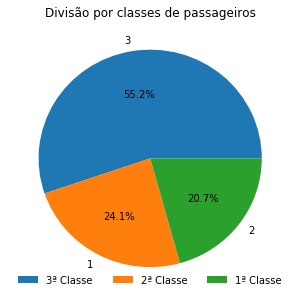

In [19]:
#Gráfico pizza para identificar a divisão por classes de passagem
fig_1 = df_titanic['Pclass'].value_counts()
fig_1.plot.pie(figsize=(5,5), autopct='%.1f%%', 
               title='Divisão por classes de passageiros');
# Ajuste dos eixos
plt.ylabel('')
plt.legend(['3ª Classe', '2ª Classe','1ª Classe'], frameon=False, loc='lower center', ncol=3);

O gráfico de pizza acima demonstra uma informacão aguardada que a maior parte dos passaageiros estariam concentrados em tickets de terceira classe. Com substancial valor para segunda e primeira classe.

In [20]:
#Vamos separar a informação dos sobreviventes para auxiliar na formação de gráficos a seguir:
sobreviventes = df_titanic[df_titanic.Survived == 1]

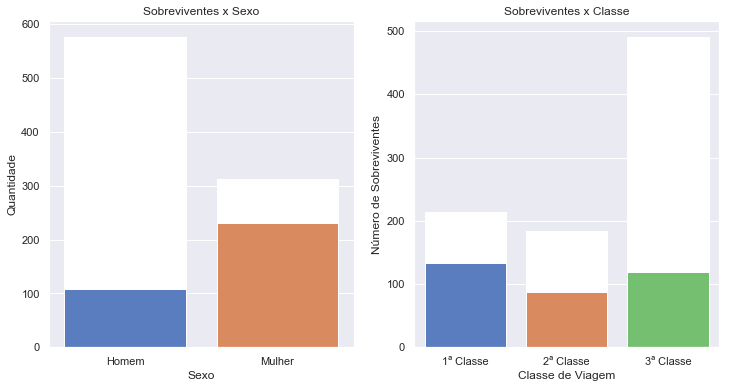

In [22]:
#Graficos de sexo por sobreviventes e por classe por sobreviventes
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.set(style="darkgrid", palette="muted", color_codes=True)

graf_1 = sns.countplot(x='Sex', color='white', ax=ax1, data=df_titanic, order=['male','female'])
graf_2 = sns.countplot(x='Sex', ax=ax1, data=sobreviventes, order=['male','female'])
# Ajuste dos eixos
graf_1.set_title('Sobreviventes x Sexo')
graf_1.set_xlabel('Sexo')
graf_1.set_xticklabels(['Homem', 'Mulher'])
graf_1.set_ylabel('Quantidade')

graf_3 = sns.countplot(x='Pclass', color='white', data=df_titanic,  order=[1, 2, 3])
graf_4 = sns.countplot(x='Pclass', data=sobreviventes,  order=[1, 2, 3])
# Ajuste dos eixos
ax2.set_title('Sobreviventes x Classe')
ax2.set_ylabel('Número de Sobreviventes')
ax2.set_xlabel('Classe de Viagem');
ax2.set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe']);

Temos dois gráficos com informações bastante importantes para nossa avaliação. O primeiro gráfico ilustra quantidade de passageiros mulher e homem (em branco) e dentro deste mesmo gráfico as quantidade de homens e mulheres sobreviventes (respectivamente em azul e laranja). Cabe observar que mais da metade das mulheres sobreviveram.

Já na imagem subsequente, temos as quantidades de passageiros dividos entre as classes de seus tickets. Novamente em branco as quantidade totais e em cor a quantidade de sobreviventes na classe. Um claro destaque para os passageiros da primeira classe, com mais de 50% da quantidade total sendo sobrevivente.

In [23]:
#Identificação de número de pais e sua distribuição
df_titanic.groupby(['Parch', 'Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           231
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

Os parâmetros _Sibsp_ e _Parch_ definem relações familiares entre os presentes no navio. A tabela acima nos dá a quantidade de membros nessa relação, ou seja, 6 foi a maior quantidade de crianças presentes numa família. Mas o grande interesse está em relacionar a quantidade de membros familiares presentes no navio e se sobreviverão ou não. Temos que para oíndice zero de relação (nenhum filho na tabela acima), temos 445 mortos e  231 vivos. Quando o indíce é 1 são 53 mortos e 65 vivos.

Abaixo vamos plotar gráficos que relacionam esses graus de parentes com com sobriviventes e vítimas do acidente do Titanic.

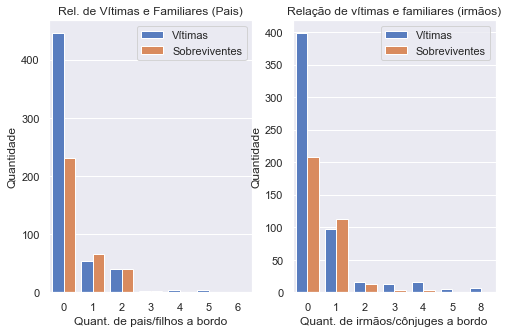

In [24]:
#Graficos de parentes presentes no navio
f, (ax3, ax4) = plt.subplots(1, 2, figsize=(8, 5))
legenda = ['Vítimas','Sobreviventes']

fig_Parch = sns.countplot(x='Parch', hue='Survived', ax=ax3, data=df_titanic);
# Ajuste dos eixos
fig_Parch.set_title('Rel. de Vítimas e Familiares (Pais)')
fig_Parch.set_xlabel('Quant. de pais/filhos a bordo')
fig_Parch.set_ylabel('Quantidade')
# Ajuste legenda
fig_Parch.legend(legenda, loc='upper right');


fig_SibSp = sns.countplot(x='SibSp', hue='Survived', ax=ax4, data=df_titanic);
# Ajuste dos eixos
fig_SibSp.set_title('Relação de vítimas e familiares (irmãos)')
fig_SibSp.set_xlabel('Quant. de irmãos/cônjuges a bordo')
fig_SibSp.set_ylabel('Quantidade')
# Ajuste legenda
fig_SibSp.legend(legenda, loc='upper right');

Temos um claro aumento de sobrevivência quando há um aumento entre as quantidade de relações familiares existentes nos indivíduos amostrados. Obviamente as barras diminuem seu tamanho devido a menor presença de indivíduos com essas características, porém proporcionalmente ocorre elevação.

In [25]:
#Tabela de embacados e sobreviventes e mortos na tragédia
df_titanic.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

Na tabela acima temos basicamente um filtro realizado na tabela geral, em que observamos as quantidades de indivíduos embarcados em cada porto relacionando isso com se sobreviveram ou não. Temos um destaque para a cidade S ou Southampton devido a grande quantidade de embarques e de mortos oriundos de lá.

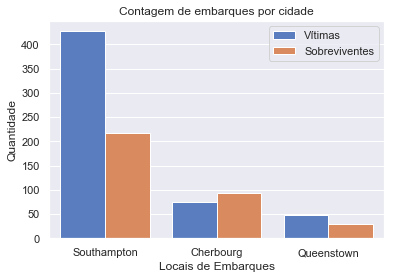

In [26]:
#Sobreviventes por portos
hist_portos = sns.countplot(x='Embarked', hue='Survived', data=df_titanic)
cidades = ["Southampton", "Cherbourg", "Queenstown"]
def ajuste_eixos(titulo,eixo_x,eixo_y,sub_eixo_x,grafico):
    '''
    Função que ajusta os eixos x, y e sub eixos de x.
        Argumentos:
        titulo: recebe string com título do gráfico
        eixo_x: recebe string com título do eixo x
        eixo_y: recebe string com título do eixo y
        sub_eixo_x: recebe list com título do sub-eixo x
        grafico: nome da varável que tem atribuido o gráfico
        Retorna:
    '''
    # Ajuste dos eixos
    grafico.set_title(titulo)
    grafico.set_xlabel(eixo_x)
    grafico.set_xticklabels(sub_eixo_x)
    grafico.set_ylabel(eixo_y)


ajuste_eixos("Contagem de embarques por cidade", "Locais de Embarques","Quantidade", 
             cidades, hist_portos)
# Ajuste legenda
hist_portos.legend(legenda);

Quando plotado em gráficos as informações demonstram que a cidade com maioria presente no navio era Southampton seguida por Cherbourg e por fim Queenstown. As maiores quantidade estão conectadas com a ordem de embarque, sendo a partida de S, com paradas em C e Q, respectivamente.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


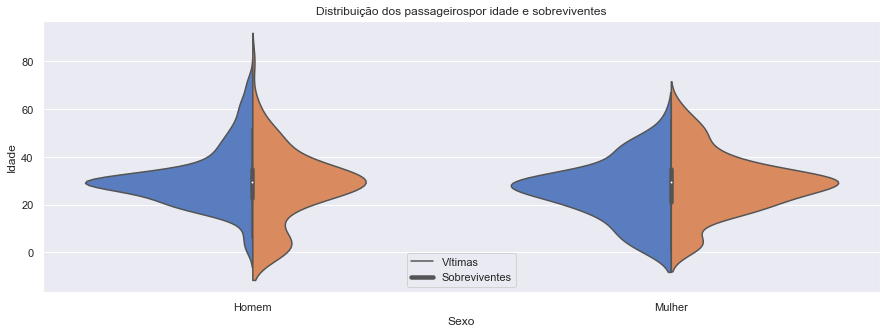

In [27]:
#Grafico violino para identificar relacao idade, sexo e sobreviventes
fig = plt.figure(figsize=(15, 5))
vio_plot = sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_titanic, split=True);

ajuste_eixos("Distribuição dos passageirospor idade e sobreviventes", "Sexo","Idade", 
             ["Homem", "Mulher"], vio_plot)
# Ajuste legenda
vio_plot.legend(['Vítimas', 'Sobreviventes'], loc='lower center');

O gráfico violino foi utilizado para visualizar a distribuição dos dados e também a densidade deles. Relacionamos sexo, idade e sobreviventes "quebrando" o gráfico ao meio para melhor visualização. O gráfico ainda nos fornece mais informacões; a parte interna de cada violino é uma plotagem possui na parte inferior e superior os primeiro e terceiro quartis, e o círculo branco dentro da caixa está na mediana da medida. 

Com estes gráficos temos uma percepção clara que a maior parte dos mortos tem idade na faixa de 20 a 40 anos. Para homem temos um pico na distrbuição para valores entre 0 e 10, indicando que muitas crianças do sexo masculino sobreviveram. Já para as mulheres a idade fez apresentou menor alteração no gráfico. Indicando as mudancas nas relações das médias de idades de sobreviventes presentes no início da análise.

In [28]:
#valores de tarifas médios para sobreviventes e mortos
filtra_media('Survived','Fare', df_titanic)

Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64


Com a tabela acima verificamos os valores de tickets médios para os sobreviventes e mortos. A partir das informações de maior quantidade de passageiros na terceira classe e de mortos também, era esperado um ticket médio menor para os mortos e maior para os vivos.

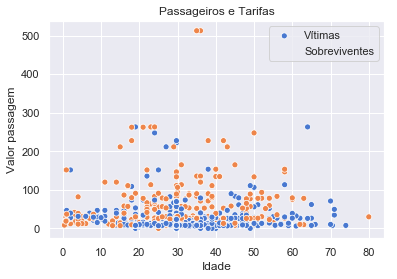

In [29]:
#grafico de relacao tarifa e sobreviventes com idade
scatter_tarifa = sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_titanic);
# Ajuste dos eixos
scatter_tarifa.set_title("Passageiros e Tarifas")
scatter_tarifa.set_xlabel("Idade")
scatter_tarifa.set_ylabel("Valor passagem")
# Ajuste legenda
scatter_tarifa.legend(legenda);

Vemos que passageiros com tarifas mais baratas morrem em maior quantidade. Então relacionamos a idade, a tarifa e a sobrevivência em um único gráfico de pontos. Temos algumas regiões com maior acúmulo de informações:
A maior concentração de passageiros que pagaram passagens caras está entre 20 e 45 anos de idade.
Dois passageiros pagaram pelas passagens mais caras e tem aprox. 35 anos.
Entre 0 e 7 anos de idade estão concentradas um grande volume de salvamentos, referentes as crianças da embarcação.
Uma grande concentração de pontos próximos a zero entre 20 e 60 anos não sobreviveram. É possível verificar também que poucos foram os passageios que pagaram passagens mais caras e não sobreviveram, reforçando a conexão com passagens mais elevadas e uma chance maior de viver.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


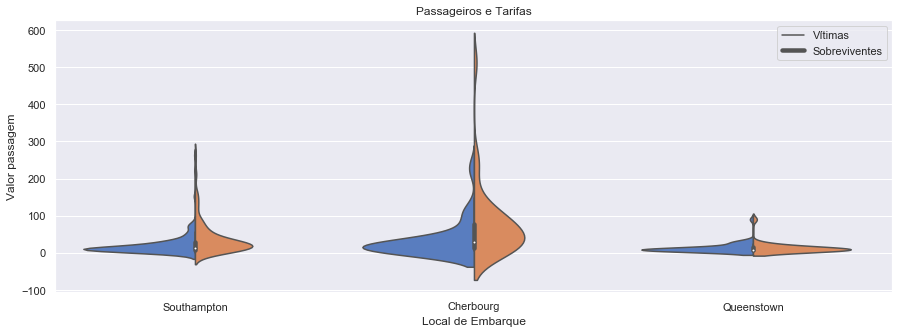

In [30]:
#Grafico violino para identificar relacao tarifa, portos embarcados e sobreviventes
f = plt.figure(figsize=(15, 5))
vio_embar = sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df_titanic, split=True);

ajuste_eixos("Passageiros e Tarifas", "Local de Embarque","Valor passagem", cidades, vio_embar)

# Ajuste legenda
vio_embar.legend(legenda);

Com os gráficos acima  temo uma visão da distribuição de sobreviventes por local embarcado, juntamente com a tarifa paga por eles. Vemos que Cherbourg apresentou um espectro largo, evidenciando variação da tarifa paga (para valores mais elevados), mas também correlacionando isso com sobreviventes.

# Etapa 4

## Conclusões

No início do projeto foram apresentadas algumas perguntas referentes aos dados. Durante a **etapa 3** diversos gráficos e tabelas foram produzidos com intuito de criar base para avaliacões sobre os dados. 

Verificamos que o famoso dito _"Abandonar o navio! Mulheres e crianças primeiro!"_ é valido, pois os dados apresentam uma quantidade maior de mulheres sobreviventes com mais de 2/3 das mulheres embarcadas sendo sobreviventes ao final da tragédia, para homens o valor não chega a 1/3, entretanto, homens mais jovens (crianças) sobreviveram em maior quantidade (indicado inclusive numa queda da média de idade de homens sobreviventes). Temos também uma grande quantidade de mortes com idades entre 20 e 40 anos, decorrente principalmente das médias gerais dos passageiros: a média da idade entre as mulheres era de 28 anos e entre os homens 30.

Como esperado a maior quantidade de pessoas no navio estavam na terceira classe. Quando relacionado esse dado aos sobreviventes, verificamos uma correlação entre a classe de passageiros e a taxa de sobrevivência. Vemos que a quantidade relativa de sobreviventes na primeira (1) e segunda classe (2) excede em muito a quantidade de indivíduos na terceira (3).

Avaliou-se também se a presença de parentes ('SibSp' e 'Parch') poderiam indicar relação com o grau de sobrevivência dos passageiros. Verificamos quanto maior a presença de irmãos ou pais, maior foi a quantidade de sobreviventes. Isso pode ocorrer por viajarem juntos e poderem se ajudar nos momentos de dificuldades.

Quando avaliamos os portos de embarque contra a quantidade de sobreviventes, temos que indivíduos que embarcaram no Porto de Southampton morreram em maior quantidade, porém a cidade com pior desempenho foi Queenstown. Uma melhor avaliação desse dado requeriu o confronto com os valores pagos pelas passagens, visto que poderia estar conectado ao poder financeiro de cada cidade do Porto e dos passageiros. Dessa forma temos que Cherbourg apresentou um espectro mais amplo de tarifas pagas (com maiores valores), indicando a maior quantidade de sobreviventes, bem como no porto de Southampton que apesar de muitas mortes possuia a maior quantidade de passageiros e alguns com tarifas de valor elevado. Ao avaliar a relação entre tarifa e sobreviventes verificamos que tarifas mais altas indicam que por levar a classes mais elevadas acarretam, portanto, em maior chance de vida no caso do acidente. O ticket médio entre os mortos foi de 22.12 e entre os vivos de 48.21.

Avaliação indica que sexo, idade, presença de parentes e o preço da tarifa foram fatores importantes para a sobrevivência, mas não podemos definir se isso é causa de sobrevivencia ou não no acidente do Titanic.

## Limitações

Verificamos algumas limitações logo no início da análise, visto que alguns parâmetros estavam deficientes de valores.

Optamos inicalmente por utilizar a informacão de índice da tabela os valores de _PassagerId_ reduzindo assim uma coluna com valor repetido.

Encontramos valores ausentes para "Cabin", "Age" e "Embarked". Sendo que optamos:<br>
_Cabin_: Não utilizar os dados no estudo, pois no levantamento de perguntas inicial não se mostrou interessante.<br>
_Age_: Para a idade preenchemos os valores ausentes com o valor da média da amostra do conjunto total.<br>
_Embarked_: Como poucas linhas apresentaram ausencia dessa valor, optamos por retirar as linhas sem essa informacão na base de dados fornecidas.<br>

Outra limitação ainda está  em definir qual desses parâmetros é mais importante: seria idade, sexo ou a tarifa paga que faria a diferença entre viver ou morrer? Entendemos que essa definição deveria ser uma sequência desse projeto em que se realizaria uma avaliação nos aspectos de nomes (de forma geral tratar melhor as variáveis em texto) poderia ser útil para, por exemplo, identificar tripulantes e se isso também é um fator relavante. 

Outro ponto limitante do trabaho é não ter melhor dividido mulheres/homens em crianças por meio da criação de um idade limite ou faixas de idades, e uso de técnicas mais sofisticadas como aprendizado de máquina e modelagem preditiva que poderiam nos ajudar a definir a importância de cada varíavel e melhor a avaliacão e compreensão do tema.

# Referências

['Titanic' completa 20 anos; saiba curiosidades por Folha de São Paulo](https://f5.folha.uol.com.br/cinema/2017/12/titanic-comemora-20-anos-saiba-curiosidades.shtml)<br>
[Critíca Titanic por Adoro Cinema](http://www.adorocinema.com/filmes/filme-5818/)<br>
[5 Ways To Handle Missing Values In Machine Learning Datasets por Kishan Maladkar](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)<br>
[How to Handle Missing Data por Alvira Swalin](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)<br>
[How to score 0.8134 in Titanic Kaggle Challenge por Ahmed Besbes](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)